In [18]:
import pandas as pd
import seaborn as sns
import ppscore as pps 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression

### Carregar dados e visualizar -  Regressao

In [19]:
# Carregar dados
df = pd.read_csv('./datasets/colesterol.csv')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     1000 non-null   object 
 2   Fumante             1000 non-null   object 
 3   Nível de Atividade  1000 non-null   object 
 4   Idade               1000 non-null   int64  
 5   Peso                1000 non-null   float64
 6   Altura              1000 non-null   int64  
 7   Colesterol          1000 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [21]:
df.head(10)

,Id,Grupo Sanguíneo,Fumante,Nível de Atividade,Idade,Peso,Altura,Colesterol
0,1,B,Sim,Baixo,33,85.1,186,199.63
1,2,A,Não,Moderado,68,105.0,184,236.98
2,3,O,Não,Alto,25,64.8,180,161.79
3,4,A,Não,Alto,43,120.2,167,336.24
4,5,AB,Não,Baixo,79,88.5,175,226.23
5,6,B,Não,Baixo,68,66.8,170,185.31
6,7,A,Sim,Baixo,60,117.3,181,289.33
7,8,O,Sim,Moderado,35,86.9,174,216.48
8,9,O,Não,Baixo,62,81.3,166,235.30
9,10,B,Sim,Alto,44,32.7,165,97.79


In [22]:
# Ajustar dataframe
df.drop('Id', axis=1, inplace=True)

#aplicar one hot nas variaveis categoricas
df = pd.get_dummies(df, columns=['Grupo Sanguíneo', 'Fumante', 'Nível de Atividade'])

In [23]:
df

,Idade,Peso,Altura,Colesterol,Grupo Sanguíneo_A,Grupo Sanguíneo_AB,Grupo Sanguíneo_B,Grupo Sanguíneo_O,Fumante_Não,Fumante_Sim,Nível de Atividade_Alto,Nível de Atividade_Baixo,Nível de Atividade_Moderado
0,33,85.1,186,199.63,False,False,True,False,False,True,False,True,False
1,68,105.0,184,236.98,True,False,False,False,True,False,False,False,True
2,25,64.8,180,161.79,False,False,False,True,True,False,True,False,False
3,43,120.2,167,336.24,True,False,False,False,True,False,True,False,False
4,79,88.5,175,226.23,False,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,68.1,166,206.81,False,True,False,False,False,True,False,False,True
996,51,47.7,170,128.03,False,False,False,True,True,False,True,False,False
997,39,85.5,176,211.14,False,True,False,False,True,False,False,True,False
998,61,91.2,161,284.53,False,True,False,False,False,True,False,True,False


### Calcular PPS - Regressão

In [24]:
# Calcular pps entre as variaveis
pps_matrix_reg = pps.matrix(df)
pps_matrix_reg

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Idade,Idade,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,Idade,Peso,0.000000,regression,True,mean absolute error,16.969100,17.814825,DecisionTreeRegressor()
2,Idade,Altura,0.000000,regression,True,mean absolute error,7.704000,7.902920,DecisionTreeRegressor()
3,Idade,Colesterol,0.000000,regression,True,mean absolute error,40.172500,42.117806,DecisionTreeRegressor()
4,Idade,Grupo Sanguíneo_A,0.028263,classification,True,weighted F1,0.620068,0.630806,DecisionTreeClassifier()
...,...,...,...,...,...,...,...,...,...
164,Nível de Atividade_Moderado,Fumante_Não,0.000000,classification,True,weighted F1,0.512000,0.490741,DecisionTreeClassifier()
165,Nível de Atividade_Moderado,Fumante_Sim,0.000000,classification,True,weighted F1,0.512000,0.490741,DecisionTreeClassifier()
166,Nível de Atividade_Moderado,Nível de Atividade_Alto,0.000003,classification,True,weighted F1,0.612078,0.612079,DecisionTreeClassifier()
167,Nível de Atividade_Moderado,Nível de Atividade_Baixo,0.436717,classification,True,weighted F1,0.498000,0.717232,DecisionTreeClassifier()


In [25]:
# ajustar a matrix para fazer o plot
pps_matrix_reg_pivot = pps_matrix_reg[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

Text(0.5, 1.0, 'Predictive Power Score - Modelo Colesterol')

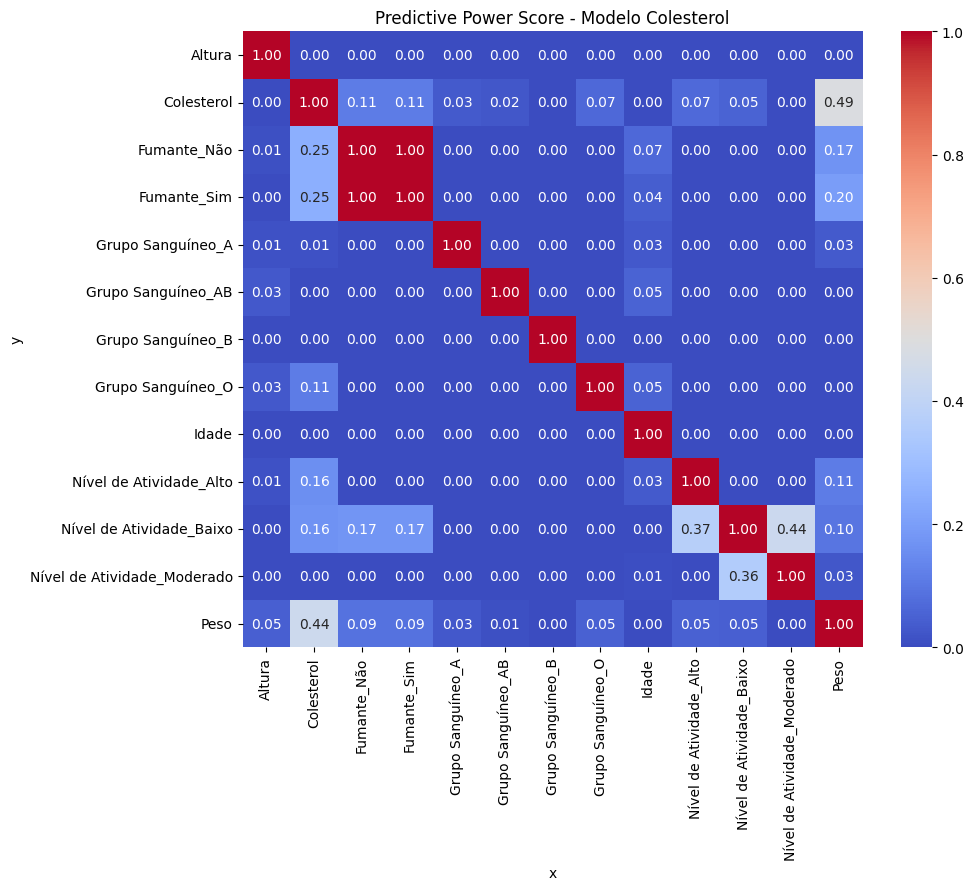

In [26]:
# plotar matriz de pps
plt.figure(figsize=(10,8))
sns.heatmap(pps_matrix_reg_pivot, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Predictive Power Score - Modelo Colesterol')

In [27]:
# Calcular pps entre duas variaiveis especificas
pps.score(df, 'Peso', 'Colesterol')

{'x': 'Peso',
 'y': 'Colesterol',
 'ppscore': np.float64(0.4905771278030162),
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 40.1725,
 'model_score': np.float64(20.464790333333333),
 'model': DecisionTreeRegressor()}

### Matriz de correlação - Regresão

In [28]:
# Calcular matriz
corr_matrix_reg = df.corr()

Text(0.5, 1.0, 'Correlação - Modelo Colesterol')

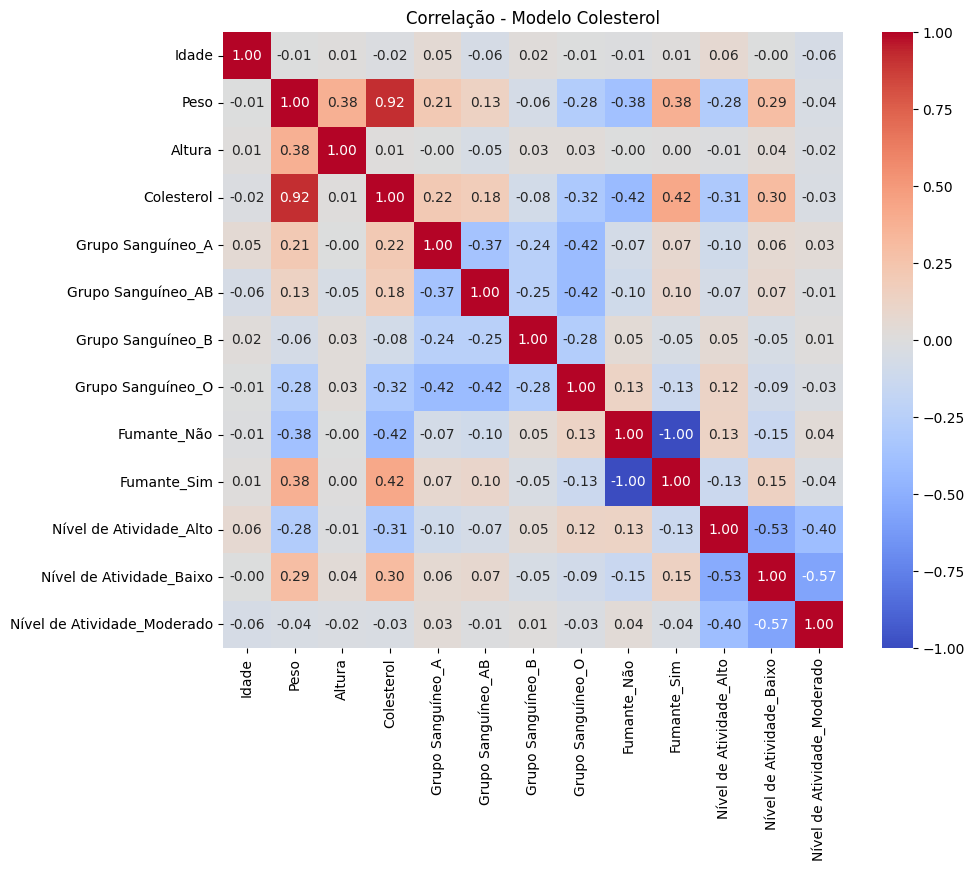

In [29]:
# plotar a matriz de correlação
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix_reg, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlação - Modelo Colesterol')

### Treinar modelo - Regressão

In [30]:
#Separar x e y
X = df.drop('Colesterol', axis=1)
y = df['Colesterol']

In [31]:
model_reg = LinearRegression()
model_reg.fit(X,y)

LinearRegression()

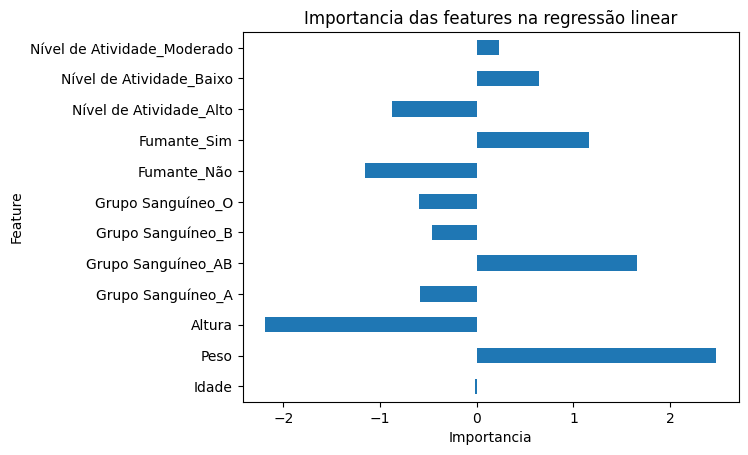

In [32]:
# Avalaiar a importancia das features com base nos coeficientes do modelo
feat_importance_reg = pd.Series(model_reg.coef_, index=X.columns)
feat_importance_reg.plot(kind='barh')
plt.xlabel('Importancia')
plt.ylabel('Feature')
plt.title('Importancia das features na regressão linear')
plt.show()

### Carregar dados - Classificação

In [33]:
#carregar dataset
df2 = pd.read_csv('./datasets/frutas.csv')

In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


In [35]:
df2.head(10)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
5,5,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523,bad
6,6,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414171,good
7,7,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125,good
8,8,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871905,bad
9,9,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185608,bad


In [42]:
#ajustar dataframe
#remover coluna A_id
df2.drop('A_id', axis=1, inplace=True)

df2['Quality'] = (df2['Quality'] == 'good').astype(int)
df2

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,0
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,1
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,0
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,1


### Calcular PPS - Classificação

{'x': 'Size',
 'y': 'Quality',
 'ppscore': np.float64(0.0350701402805611),
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 0.499,
 'model_score': np.float64(0.4815),
 'model': DecisionTreeRegressor()}

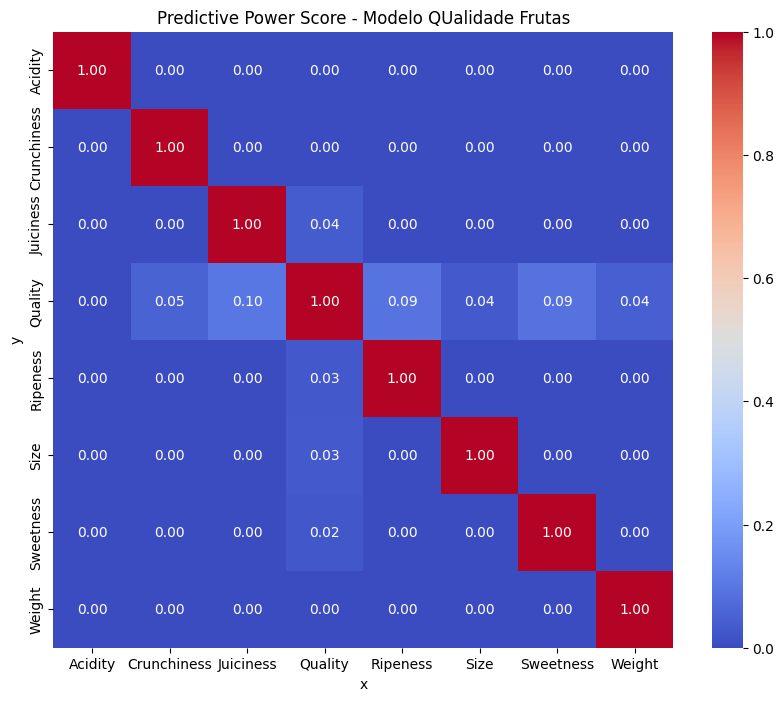

In [43]:
### Calcular PPS - classressão
# Calcular pps entre as variaveis
pps_matrix_class = pps.matrix(df2)
pps_matrix_class
# ajustar a matrix para fazer o plot
pps_matrix_class_pivot = pps_matrix_class[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
# plotar matriz de pps
plt.figure(figsize=(10,8))
sns.heatmap(pps_matrix_class_pivot, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Predictive Power Score - Modelo QUalidade Frutas')
# Calcular pps entre duas variaiveis especificas
pps.score(df2, 'Size', 'Quality')

### Matriz de correlação - Classificação

Text(0.5, 1.0, 'Correlação - Modelo Qualidade Frutas')

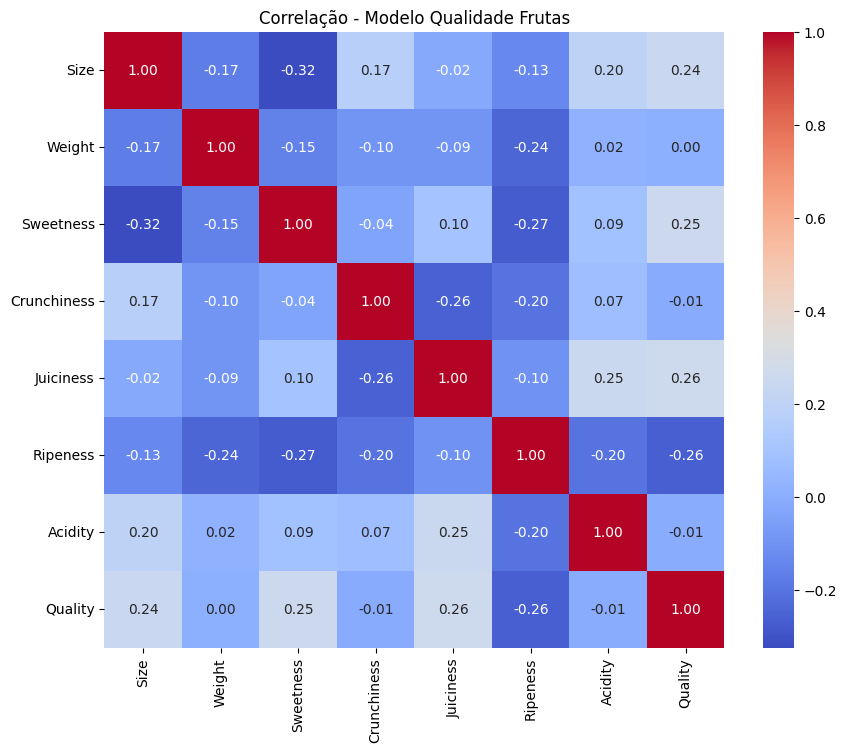

In [44]:
### Matriz de correlação - classresão
# Calcular matriz
corr_matrix_class = df2.corr()
# plotar a matriz de correlação
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix_class, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlação - Modelo Qualidade Frutas')

### Treinar modelo - Classificação

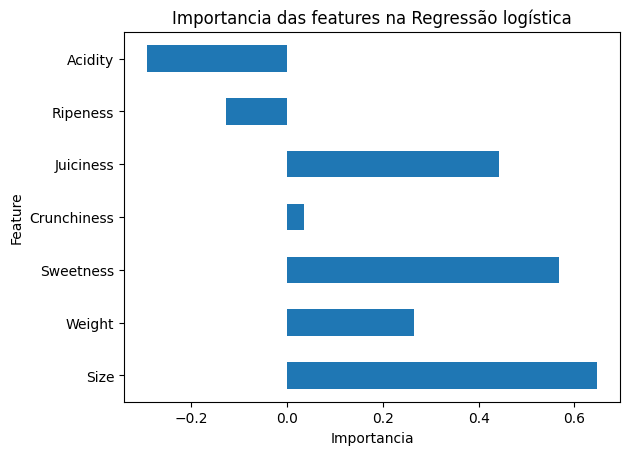

In [45]:
### Treinar modelo - classressão
#Separar x e y
X = df2.drop('Quality', axis=1)
y = df2['Quality']
model_lr = LogisticRegression()
model_lr.fit(X,y)
# Avalaiar a importancia das features com base nos coeficientes do modelo
feat_importance_class = pd.Series(model_lr.coef_[0], index=X.columns)
feat_importance_class.plot(kind='barh')
plt.xlabel('Importancia')
plt.ylabel('Feature')
plt.title('Importancia das features na Regressão logística')
plt.show()